                    Polsko Japońska Akademia Technik Komputerowych w Warszawie

                                           Projekt własny


                                          Marcin Rzeźniczuk


Analiza predykcyjna cen wybranego produktu dla obszaru Stanów Zjednoczonych Ameryki Północnej, z uwzglednieniem różnych metod predykcji.


1. Zrozumienie uwarunkowań biznesowych.

Umiejetnosc przewidywania cen produktów, jest od momentu poczatków badań nad rynkami, elementem pożadanym przez każde przedsiebiorstwo zajmujace sie sprzedaża produktów jak również i analitykow zajmujących sie ich badaniami. Predykcja pozwala na dostosowanie zarówno planów producyjnych, harmonogramów transportu jak i wielkosci zapasów. Wszystko w celu zwiekszenia sprzedaży i redukcji kosztów, które przez firmy stawiane sa na pierwszym miejscu jeżeli chodzi o możliwości optymalizacji procesów.

2. Zrozumienie danych.

Dane wykorzystane do predykcji zawierają zbiór danych przedstawiony przez Hass Avocado Board w maju 2018, który został skompilowany do pojedynczego pliku CSV. Zbiór danych prezentuje dane pochodzące bezpośrednio od sprzedawców, zbieranych za pomocą danych z kas fiskalnych. Okres za jakie zostały przedstawione dane do lata 2015-2018 i zawierają zaagregowane dane ze wszystkich kanałów sprzedaży (sklepy: małe, duże, markety). Średnia cena za awokado typu Hass podana jest za sztukę, także w przypadku gdy ilość owoców jest większa niż jeden, tak jak to jest w przypadku sprzedazy w workach.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ggplot

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [3]:
df = pd.read_csv("C:/Users/mrzez/Desktop/avocado.csv")
#df = pd.read_csv("../avocado.csv")

Zbiór danych składa się z 18 249 wierszy oraz 14 kolumn.

In [4]:
df.shape

(18249, 14)

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Opis kolumn:

    "Date" - data w formacie "rrrr-mm-dd"
    "AveragePrice" - cena srednia
    "TotalVolume" - wolumen suma
    "4046" - awokado typ 4046
    "4225" - awokado typ 4225
    "4770" - awokado typ 4770
    "Total Bags" - suma workow
    "Small Bags" - suma malych workow
    "Large Bags" - suma duzych workow
    "XLarge Bags" - suma bardzo duzych workow
    "type" - conventional (awokado standardowe), organic (awokado organiczne)
    "year" - rok
    "region" - region w USA (stan)
    

Usunięcie kolumny unnamed.

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Poniżej zostały przedstawienie wielkości charakteryzujące opisywany zbiór danych.

In [8]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


W celu przeprowadzenia predykcji należy upewnić się że zbiór danych nie zawiera wartości null. Rozpatrywany zbiór już na etapie agregacji został poddany obróbce pod kątem integralności i czystości danych. W innych przypadkach konieczne jest odpowiednia obróbka danych.

In [9]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Zbiór danych zawiera podział na dwie podgrupy owoców awokado: "conventional" i "organic".    

In [10]:
df.groupby('type').groups

{'conventional': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             9116, 9117, 9118, 9119, 9120, 9121, 9122, 9123, 9124, 9125],
            dtype='int64', length=9126),
 'organic': Int64Index([ 9126,  9127,  9128,  9129,  9130,  9131,  9132,  9133,  9134,
              9135,
             ...
             18239, 18240, 18241, 18242, 18243, 18244, 18245, 18246, 18247,
             18248],
            dtype='int64', length=9123)}

Przedstawienie średniej ceny awokado (niezależnie od typu) w okresie opisywanym przez dane.

Text(0, 0.5, 'Average Price')

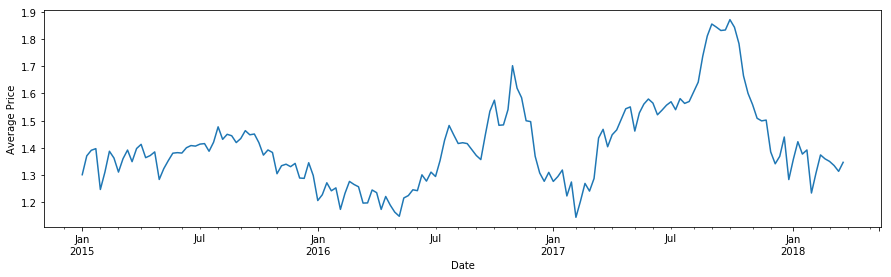

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
date_price = df.groupby('Date').mean()
date_price.AveragePrice.plot(figsize=(15,4))
plt.ylabel('Average Price')

Zgodnie z obserwacją, owoce typu "conventional" zawierają się w wierszach 1 do 9125. Natomiast typu "organic" w wierszach od 9126 do 18248.

In [12]:
conventional = df[df['type'] == 'conventional']
organic = df[df['type'] == 'organic']

Ze średnich wartości ceny typów awokado możemy wyznaczyć różnicę pomiędzy cenami awokadu typu "coventional" i "organic". Co oczywiste awokado "organic" ze względu na sposób uprawy trend produktów typu "bio", charakteryzuje się średnią ceną większą od "conventional" o około 43%

In [13]:
diffprice = abs(conventional['AveragePrice'].mean() - organic['AveragePrice'].mean())
mean_conv = conventional['AveragePrice'].mean()
mean_org = organic['AveragePrice'].mean()
print('średnia cena awokado conventional: {0:.4f}'.format(round(mean_conv,4)))
print('średnia cena awokado organic: {0:.4f}'.format(round(mean_org,4)))
print('różnica w cenie średniej conventional/organic: {0:.4f}'.format(round(diffprice,4)))
print('% różnica w cenie średniej conventional/organic: {0:.2f} %'.format(round(diffprice/mean_conv,2)))

średnia cena awokado conventional: 1.1580
średnia cena awokado organic: 1.6540
różnica w cenie średniej conventional/organic: 0.4960
% różnica w cenie średniej conventional/organic: 0.43 %


In [14]:
max_conv=df.loc[conventional['AveragePrice'].idxmax()]
print(max_conv)

Date            2017-10-08 00:00:00
AveragePrice                   2.22
Total Volume                 516321
4046                        62315.4
4225                         296817
4770                        87406.9
Total Bags                  69780.9
Small Bags                  66070.2
Large Bags                  3699.01
XLarge Bags                   11.73
type                   conventional
year                           2017
region                      Chicago
Name: 6052, dtype: object


In [15]:
max_organic=df.loc[organic['AveragePrice'].idxmax()]
print(max_organic)

Date            2016-10-30 00:00:00
AveragePrice                   3.25
Total Volume                16700.9
4046                        2325.93
4225                        11142.9
4770                              0
Total Bags                  3232.16
Small Bags                  3232.16
Large Bags                        0
XLarge Bags                       0
type                        organic
year                           2016
region                 SanFrancisco
Name: 14125, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


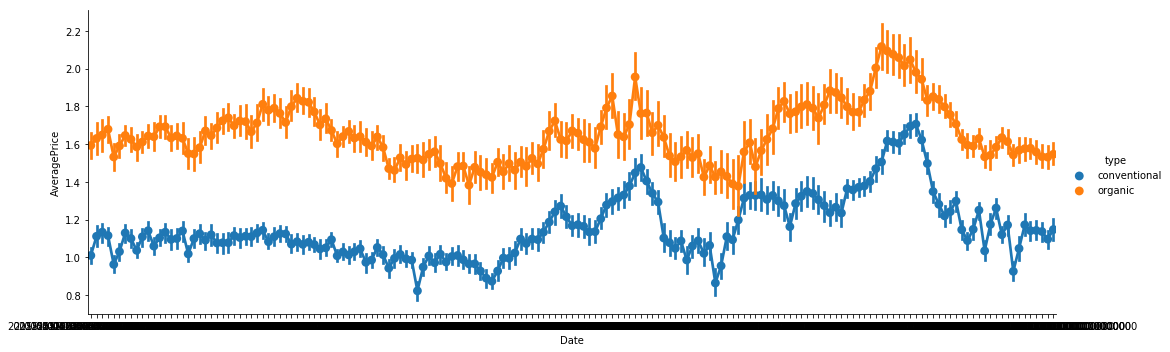

In [16]:
trend_seas= sns.factorplot(x='Date',y='AveragePrice', data = df, hue = 'type', aspect = 3)

Text(0, 0.5, 'Average Price')

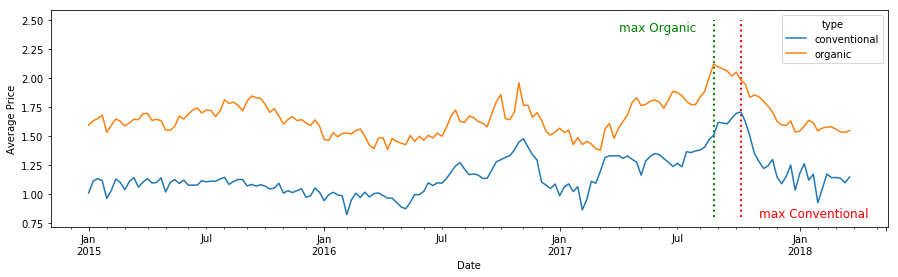

In [17]:
date_price_t = df.pivot_table(index = 'Date',columns = 'type', aggfunc = 'mean')['AveragePrice']
date_price_t.plot(figsize = (15,4))
plt.text(x='2017-4-1',y=2.4,s='max Organic',color = 'green',fontsize=12)
plt.vlines(x='2017-8-25',ymin=0.8,ymax=2.5,color='green', linestyles=':',linewidth=2,label='September 2017')
plt.text(x='2017-11-1',y=0.8,s='max Conventional',color = 'red',fontsize=12)
plt.vlines(x='2017-10-6',ymin=0.8,ymax=2.5,color='red', linestyles=':',linewidth=2,label='September 2017')
plt.ylabel('Average Price')

Dane sprzedażowe zostały podzielone na poszczególne regiony w USA, które zawierają około 338 pomiarów wyrażonych w liczbie dni kiedy pomiary były przeprowadzane.

In [18]:
regions = df.groupby(df.region)
print("Total regions:", len(regions))
print("-----------------")
for name, group in regions:
    print(name," : ",len(group))

Total regions: 54
-----------------
Albany  :  338
Atlanta  :  338
BaltimoreWashington  :  338
Boise  :  338
Boston  :  338
BuffaloRochester  :  338
California  :  338
Charlotte  :  338
Chicago  :  338
CincinnatiDayton  :  338
Columbus  :  338
DallasFtWorth  :  338
Denver  :  338
Detroit  :  338
GrandRapids  :  338
GreatLakes  :  338
HarrisburgScranton  :  338
HartfordSpringfield  :  338
Houston  :  338
Indianapolis  :  338
Jacksonville  :  338
LasVegas  :  338
LosAngeles  :  338
Louisville  :  338
MiamiFtLauderdale  :  338
Midsouth  :  338
Nashville  :  338
NewOrleansMobile  :  338
NewYork  :  338
Northeast  :  338
NorthernNewEngland  :  338
Orlando  :  338
Philadelphia  :  338
PhoenixTucson  :  338
Pittsburgh  :  338
Plains  :  338
Portland  :  338
RaleighGreensboro  :  338
RichmondNorfolk  :  338
Roanoke  :  338
Sacramento  :  338
SanDiego  :  338
SanFrancisco  :  338
Seattle  :  338
SouthCarolina  :  338
SouthCentral  :  338
Southeast  :  338
Spokane  :  338
StLouis  :  338
Syracus

W związku z tym, że cena awokado nie zależy tylko od jego typu ale także od regionu sprzedaży, poniższe wykresy przedstawiają zależności pomiędzy nimi w podziale na poszczególne lata sprzedaży.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Średnia cena w regionie - typ "Conventional"')

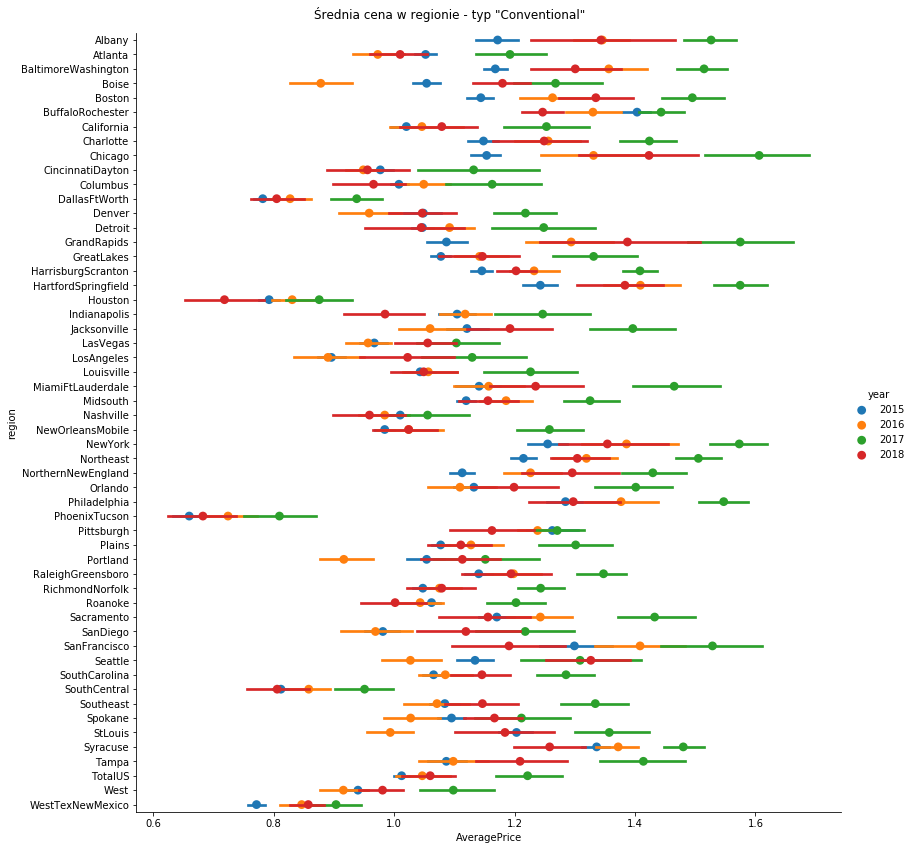

In [19]:
mask_conv = df['type'] =='conventional'

g = sns.factorplot('AveragePrice','region',data = df[mask_conv],hue = 'year',height = 12,aspect = 1, join = False,)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Średnia cena w regionie - typ "Conventional"')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 0.98, 'Średnia cena w regionie - typ "Organic"')

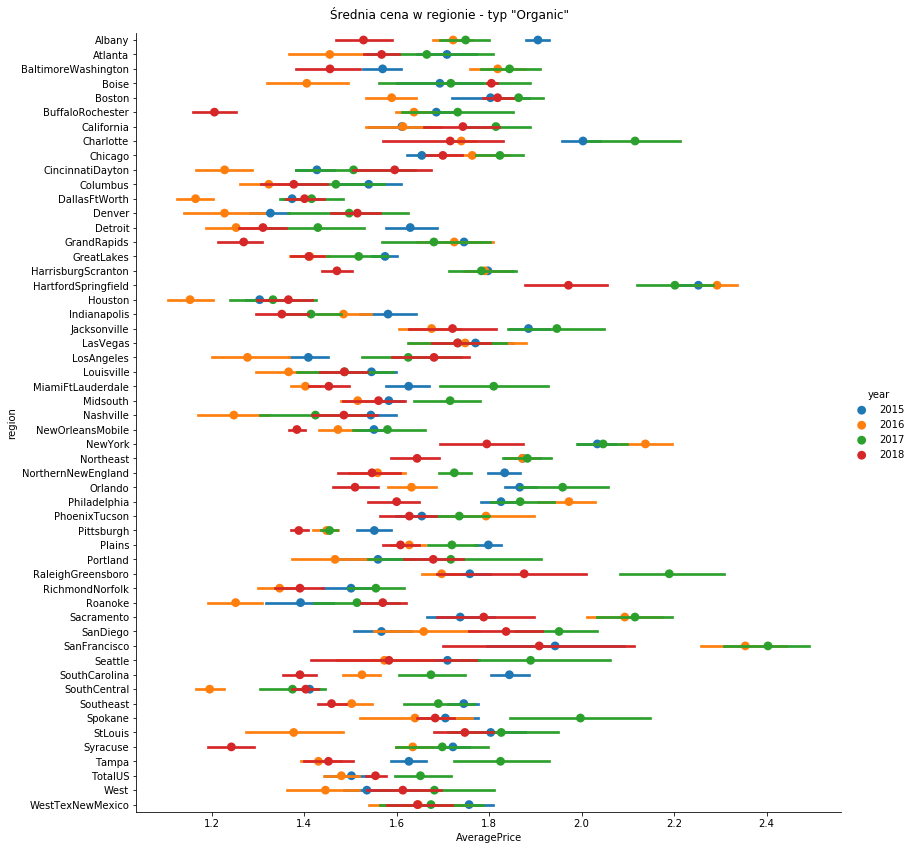

In [20]:
mask_org = df['type'] =='organic'

g = sns.factorplot('AveragePrice','region',data = df[mask_org],hue = 'year',height = 12,aspect = 1, join = False,)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Średnia cena w regionie - typ "Organic"')

Aby przeprowadzić odpowiednia predykcję danych należy zbadać ich korelacje. W tym celu potrzeba jest przeprowadzenia zamiany danychtypu label "type" na wartości typu int.

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}
label.fit(df.type.drop_duplicates())
dicts['type'] = list(label.classes_)
df.type=label.transform(df.type)

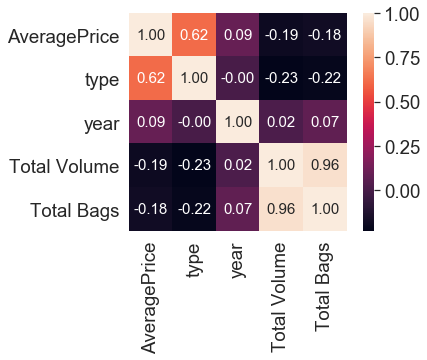

In [22]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cols
column_map = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.7)
heat_map = sns.heatmap(column_map,cbar = True, 
                 annot = True,square = True, 
                 fmt ='.2f', 
                 annot_kws = {'size':15}, 
                 yticklabels = cols, xticklabels =cols)

Cena awokado jest skorelowana ze zmienna typu type. Z wykresu można odczytać także silną zależność pomiedzy wielkością "Total Bags" i "Total Volume".

    3.Predykcja danych

Predykcja danych bedzie polegała na użyciu 

Zamiana kolumny date na odzielne kolumny dla dni, miesięcy i roku.

In [23]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29


Regresja liniowa

Now our data are ready! lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice'is continuous. Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable

Modelowanie zmiennych

In [46]:
ts = 0.3
rs = 70

In [47]:
X=df.iloc[:,1:14]
y=df['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=ts,random_state=rs)

Tworzenie i trenowanie modelu


In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [49]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23169677705871053
MSE: 0.09044010202264167
RMSE: 0.30073260884487013


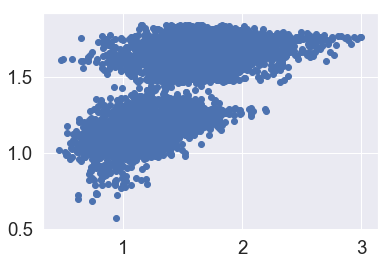

In [50]:
plt.scatter(x=y_test,y=pred)

Drzewo decyzyjne

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

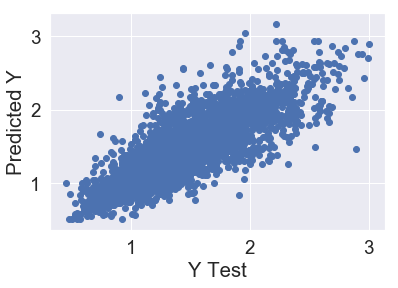

In [52]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

RMSE

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13886940639269404
MSE: 0.04397568949771689
RMSE: 0.2097038137414694


Las drzew

In [54]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10986575342465753
MSE: 0.024499325479452053
RMSE: 0.15652260373330126


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


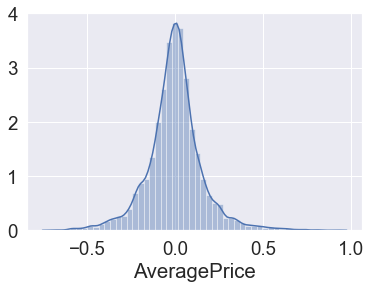

In [56]:
sns.distplot((y_test-pred),bins=50)

sprawdzenie

,Y Test,Pred
11461,1.66,1.750
7427,1.52,1.409
13966,0.98,1.130
6621,0.57,0.765
10809,2.06,1.976


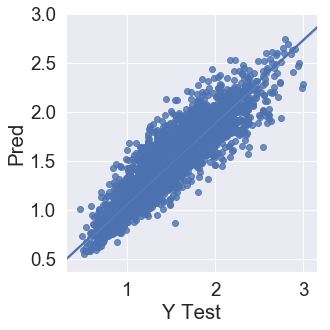

In [57]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [ ]:
#choose the region for each the prediction will be done
PREDICTING_FOR = "TotalUS"

In [ ]:
PREDICTION_TYPE = 'conventional'
df_pred = df[df.type == PREDICTION_TYPE]

In [ ]:
date_price = regions.get_group(PREDICTING_FOR)[['Date','AveragePrice']].reset_index(drop=True)

In [ ]:
date_price.plot(x='Date',y='AveragePrice',kind='line')

In [ ]:
date_price = date_price.rename(columns={'Date':"ds",'AveragePrice':"y"})
date_price

In [ ]:
#prophet
m = Prophet(weekly_seasonality = True, daily_seasonality = True)
m.fit(date_price)

In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
forecast.tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)